In [1]:
import tidy3d as td
import numpy as np
from tidy3d import web



# Waveguide dimensions
wg_height = 0.22  # µm
wg_width = 0.5    # µm
wg_length = 10.0  # µm

# Substrate thickness
sub_thickness = 2.0   # µm

# Gold plate dimensions
gold_height = 0.05     # µm
gold_width = 0.25      # µm
gold_length = 2.25      # µm
gold_offset = 0.03     # µm

# Padding
pad_xy = 2.0  # µm
pad_z = 1.0   # µm above gold

# Simulation domain size
domain_size = [
    wg_length + pad_xy,
    wg_width + pad_xy,
    sub_thickness + wg_height + gold_offset + gold_height + pad_z
]

# Materials
silicon = td.material_library["cSi"]["Palik_Lossless"]
sio2 = td.Medium(permittivity=2.1, name="SiO2_Lossless")
si3n4 = td.Medium(permittivity=4.0, name="Si3N4_Lossless")
gold = td.material_library["Au"]["RakicLorentzDrude1998"]


# Structures
substrate = td.Structure(
    geometry=td.Box(
        center=[0.0, 0.0, -sub_thickness / 2],
        size=[td.inf, td.inf, sub_thickness]
    ),
    medium=sio2,
    name="SiO2_Substrate"
)

waveguide = td.Structure(
    geometry=td.Box(
        center=[0.0, 0.0, wg_height / 2],
        size=[td.inf, wg_width, wg_height]
    ),
    medium=silicon,
    name="Si_Waveguide"
)

gold_plate = td.Structure(
    geometry=td.Box(
        center=[0.0, wg_width / 2 - gold_width / 2, wg_height + gold_offset + gold_height / 2],
        size=[gold_length, gold_width, gold_height]
    ),
    medium=gold,
    name="Au_Plate"
)



In [3]:
# Wavelength range
wl1 = 1.4
wl2 = 1.7

# Transforming in frequency
f1 = td.C_0 / wl2
f2 = td.C_0 / wl1

fwidth = (f2 - f1) / 2
freq0 = f1 + fwidth
wl0 = td.C_0 / freq0

# Frequencies to analyze
num_freqs = 21
freqs = [freq0] if num_freqs == 1 else np.linspace(freq0 - fwidth, freq0 + fwidth, num_freqs)

In [4]:
# Monitor positions
gold_start_x = -gold_length / 2
gold_end_x = gold_length / 2

# Source
source_time = td.GaussianPulse(freq0=freq0, fwidth=fwidth)
source = td.ModeSource(
    center=(-wg_length / 2, 0, wg_height / 2), size=(0, 1, 1), source_time=source_time, mode_index=0, direction="+",
    mode_spec=td.ModeSpec(
        num_modes=1,         # Solve only for fundamental mode
        target_neff=2.5      # Optional: guides solver toward expected effective index
    )
)

monitor1 = td.FieldMonitor(
    center=[gold_start_x * 1.5 , 0.0, wg_height / 2],
    size=[0.0, 2.0 , 2.0],
    freqs=freqs,
    name="monitor_start_gold",
    fields=["Ex", "Ey", "Ez", "Hx", "Hy", "Hz"]
)

monitor2 = td.FieldMonitor(
    center=[gold_end_x * 1.5, 0.0, wg_height / 2],
    size=[0.0, 2.0 , 2.0],
    freqs=freqs,
    name="monitor_end_gold",
    fields=["Ex", "Ey", "Ez", "Hx", "Hy", "Hz"]
)

monitor3 = td.ModeMonitor(
    center=[4.0, 0.0, wg_height / 2],
    size=[0.0, 2.0 , 2.0],
    freqs=freqs,
    mode_spec=td.ModeSpec(num_modes=4),
    name="out_modes"
)

# Field monitor
field_mon = td.FieldMonitor(
    name="field_mon",
    size=(td.inf, td.inf, 0),
    center=(0, 0, wg_height / 2),
    freqs=freqs,
    fields=["Ex", "Ey", "Ez", "Hx", "Hy", "Hz"]
)

# Simulation setup
sim = td.Simulation(
    size=domain_size,
    grid_spec=td.GridSpec.auto(min_steps_per_wvl=20),
    medium=sio2,
    structures=[substrate, waveguide, gold_plate],
    monitors=[monitor1, monitor2,field_mon],
    sources=[source],
    run_time=2e-12,
    boundary_spec=td.BoundarySpec.all_sides(boundary=td.PML())
)

# Visualize geometry
sim.plot_3d()

In [5]:
# GridSpec
min_steps_per_wvl = 40
grid_spec = td.GridSpec.auto(min_steps_per_wvl=min_steps_per_wvl)

In [6]:
task_id = web.upload(sim, "HPR")
cost = web.estimate_cost(task_id)


11:13:22 SE Asia Standard Time Created task 'HPR' with task_id                  
                               'fdve-55635b73-d327-41dc-9eb4-34500719c8a9' and  
                               task_type 'FDTD'.

                               View task using web UI at                        
                               ]8;id=972972;https://tidy3d.simulation.cloud/workbench?taskId=fdve-55635b73-d327-41dc-9eb4-34500719c8a9\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=992807;https://tidy3d.simulation.cloud/workbench?taskId=fdve-55635b73-d327-41dc-9eb4-34500719c8a9\taskId]8;;\
                               ]8;id=972972;https://tidy3d.simulation.cloud/workbench?taskId=fdve-55635b73-d327-41dc-9eb4-34500719c8a9\=]8;;\]8;id=8272;https://tidy3d.simulation.cloud/workbench?taskId=fdve-55635b73-d327-41dc-9eb4-34500719c8a9\fdve]8;;\]8;id=972972;https://tidy3d.simulation.cloud/workbench?taskId=fdve-55635b73-d327-41dc-9eb4-34500719c8a9\-55635b73-d327-41dc-9eb4-34500719c8a9']8;;\.

                               Task folder: ]8;id=771322;https://tidy3d.simulation.cloud/folders/folder-ee7596ab-29a2-4b8e-84ce-7d1df42f0447\'default']8;;\.

Output()

11:13:26 SE Asia Standard Time Maximum FlexCredit cost: 0.458. Minimum cost     
                               depends on task execution details. Use           
                               'web.real_cost(task_id)' to get the billed       
                               FlexCredit cost after a simulation run.

11:13:27 SE Asia Standard Time Maximum FlexCredit cost: 0.458. Minimum cost     
                               depends on task execution details. Use           
                               'web.real_cost(task_id)' to get the billed       
                               FlexCredit cost after a simulation run.

In [7]:
sim_data = web.run(sim, "HPR")

11:13:30 SE Asia Standard Time Created task 'HPR' with task_id                  
                               'fdve-ff7d5fb4-dea5-4040-8a6f-e4a9679faff2' and  
                               task_type 'FDTD'.

                               View task using web UI at                        
                               ]8;id=270845;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ff7d5fb4-dea5-4040-8a6f-e4a9679faff2\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=589657;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ff7d5fb4-dea5-4040-8a6f-e4a9679faff2\taskId]8;;\
                               ]8;id=270845;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ff7d5fb4-dea5-4040-8a6f-e4a9679faff2\=]8;;\]8;id=361197;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ff7d5fb4-dea5-4040-8a6f-e4a9679faff2\fdve]8;;\]8;id=270845;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ff7d5fb4-dea5-4040-8a6f-e4a9679faff2\-ff7d5fb4-dea5-4040-8a6f-e4a9679faff2']8;;\.

                               Task folder: ]8;id=58604;https://tidy3d.simulation.cloud/folders/folder-ee7596ab-29a2-4b8e-84ce-7d1df42f0447\'default']8;;\.

Output()

11:13:36 SE Asia Standard Time Maximum FlexCredit cost: 0.458. Minimum cost     
                               depends on task execution details. Use           
                               'web.real_cost(task_id)' to get the billed       
                               FlexCredit cost after a simulation run.

11:13:42 SE Asia Standard Time status = queued

                               To cancel the simulation, use                    
                               'web.abort(task_id)' or 'web.delete(task_id)' or 
                               abort/delete the task in the web UI. Terminating 
                               the Python script will not stop the job running  
                               on the cloud.

Output()

11:13:50 SE Asia Standard Time starting up solver

                               running solver

Output()

11:14:12 SE Asia Standard Time early shutoff detected at 16%, exiting.

                               status = postprocess

Output()

11:14:17 SE Asia Standard Time status = success

11:14:19 SE Asia Standard Time View simulation result at                        
                               ]8;id=882869;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ff7d5fb4-dea5-4040-8a6f-e4a9679faff2\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=749874;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ff7d5fb4-dea5-4040-8a6f-e4a9679faff2\taskId]8;;\
                               ]8;id=882869;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ff7d5fb4-dea5-4040-8a6f-e4a9679faff2\=]8;;\]8;id=386612;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ff7d5fb4-dea5-4040-8a6f-e4a9679faff2\fdve]8;;\]8;id=882869;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ff7d5fb4-dea5-4040-8a6f-e4a9679faff2\-ff7d5fb4-dea5-4040-8a6f-e4a9679faff2']8;;\.

Output()

11:16:31 SE Asia Standard Time loading simulation from simulation_data.hdf5

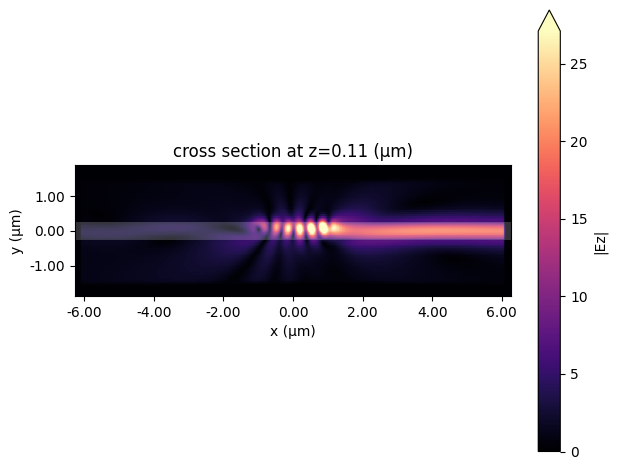

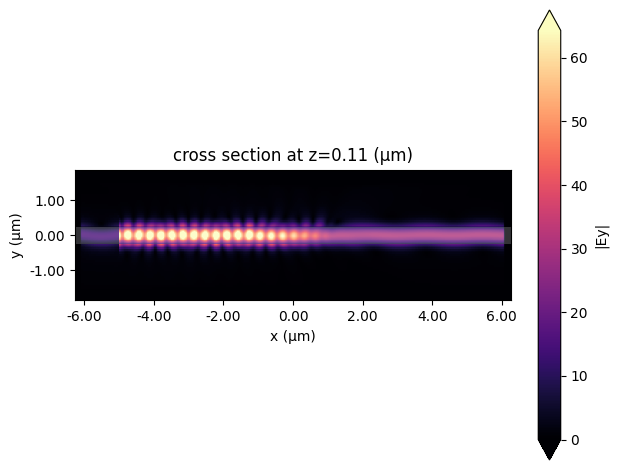

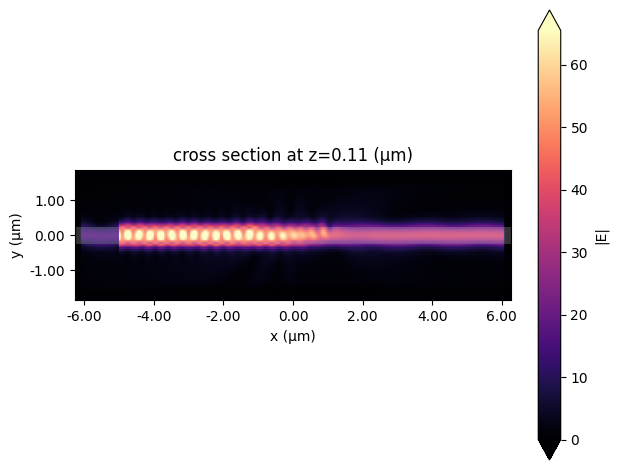

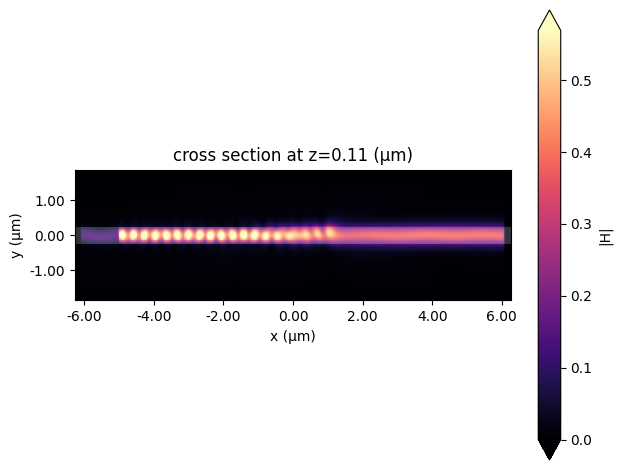

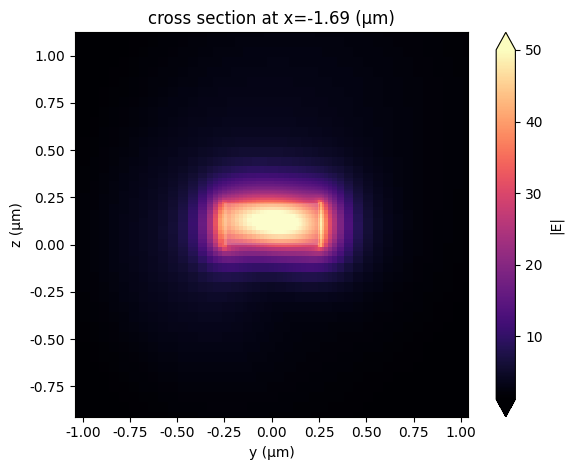

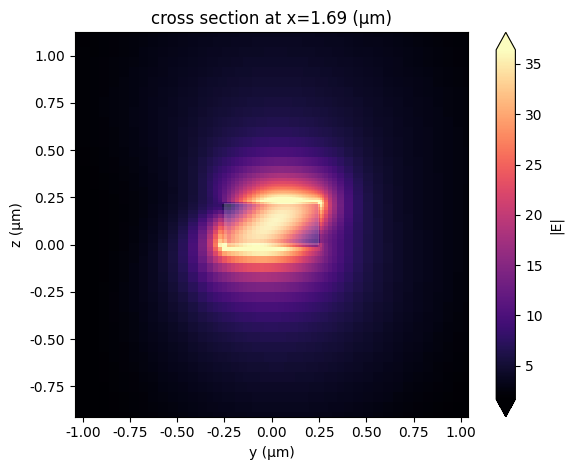

In [8]:
import matplotlib.pyplot as plt

# Define wavelength in microns
wavelength_um = 1.55

# Convert to frequency in Hz using speed of light
frequency = td.C_0 / (wavelength_um)

# Plot the absolute value of the E field at 1.55 µm
sim_data.plot_field(field_monitor_name="field_mon", field_name="Ez", val="abs", f=frequency)
sim_data.plot_field(field_monitor_name="field_mon", field_name="Ey", val="abs", f=frequency)
sim_data.plot_field(field_monitor_name="field_mon", field_name="E", val="abs", f=frequency)
sim_data.plot_field(field_monitor_name="field_mon", field_name="H", val="abs", f=frequency)
sim_data.plot_field(field_monitor_name="monitor_start_gold", field_name="E", val="abs", f=frequency)
sim_data.plot_field(field_monitor_name="monitor_end_gold", field_name="E", val="abs", f=frequency)
plt.show()

In [ ]:
print(sim_data["monitor_end_gold"].Ex.f)

In [ ]:
Ezi_avg = sim_data["monitor_start_gold"].Ez.sel(f=frequency, method="nearest").mean(dim=["y", "z"])
Eyi_avg = sim_data["monitor_start_gold"].Ey.sel(f=frequency, method="nearest").mean(dim=["y", "z"])

Ezo_avg = sim_data["monitor_end_gold"].Ez.sel(f=frequency, method="nearest").mean(dim=["y", "z"])
Eyo_avg = sim_data["monitor_end_gold"].Ey.sel(f=frequency, method="nearest").mean(dim=["y", "z"])


In [ ]:
import numpy as np

# Convert to numpy arrays
Exi_np = Ezi_avg.values
Eyi_np = Eyi_avg.values

Exo_np = Ezo_avg.values
Eyo_np = Eyo_avg.values

# Stokes parameters
S0i = np.abs(Exi_np)**2 + np.abs(Eyi_np)**2
S1i = np.abs(Exi_np)**2 - np.abs(Eyi_np)**2
S2i = 2 * np.real(Exi_np * np.conj(Eyi_np))
S3i = 2 * np.imag(Exi_np * np.conj(Eyi_np))

S0o = np.abs(Exo_np)**2 + np.abs(Eyo_np)**2
S1o = np.abs(Exo_np)**2 - np.abs(Eyo_np)**2
S2o = 2 * np.real(Exo_np * np.conj(Eyo_np))
S3o = 2 * np.imag(Exo_np * np.conj(Eyo_np))

# Normalize
s1i = S1i / S0i
s2i = S2i / S0i
s3i = S3i / S0i

s1o = S1o / S0o
s2o = S2o / S0o
s3o = S3o / S0o


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Draw unit sphere
u = np.linspace(0, 2*np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='lightblue', alpha=0.3, edgecolor='gray', linewidth=1.0, rstride=5, cstride=5)

# Plot polarization point
ax.scatter(s1i, s2i, s3i, color='blue', s=100)
ax.scatter(s1o, s2o, s3o, color='red', s=100)

# Draw x, y, z axes from center
ax.quiver(0, 0, 0, 1, 0, 0, color='black', arrow_length_ratio=0.05)
ax.quiver(0, 0, 0, -1, 0, 0, color='black', arrow_length_ratio=0.05)
ax.quiver(0, 0, 0, 0, 1, 0, color='black', arrow_length_ratio=0.05)
ax.quiver(0, 0, 0, 0, -1, 0, color='black', arrow_length_ratio=0.05)
ax.quiver(0, 0, 0, 0, 0, 1, color='black', arrow_length_ratio=0.05)
ax.quiver(0, 0, 0, 0, 0, -1, color='black', arrow_length_ratio=0.05)


# Add grid lines
ax.grid(True)

# Axis labels
ax.set_xlabel('S1')
ax.set_ylabel('S2')
ax.set_zlabel('S3')
ax.set_title('Poincaré Sphere')

plt.show()


In [ ]:
md = sim_data["out_modes"]


P_modes = md.flux.values   # shape: (frequency, mode)
P_total = np.sum(P_modes, axis=-1)
